In [23]:
import importlib

import numpy as np
import matplotlib.pyplot as plt

import hw5_version
importlib.reload(hw5_version)




<module 'hw5_version' from 'C:\\Users\\George\\Desktop\\CS155_Project2\\CS155_PROJECT2\\Visualizations\\hw5_version.py'>

In [24]:
Y_train = np.loadtxt('./data/train.txt').astype(int)
Y_test = np.loadtxt('./data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


K = 20
eta = 0.03
reg = 0


Using the Homework 5 version of SVD 

In [25]:
U,V, err = hw5_version.train_model(M, N, K, eta, reg, Y_train)

In [26]:
print(err)
print(hw5_version.get_err(U,V,Y_test))

0.2602318449438767
0.6295831644033009


(2, 943)


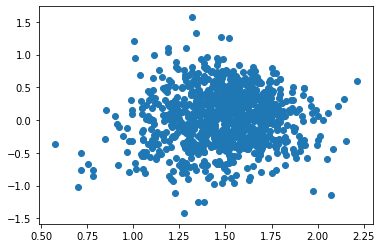

In [41]:
A, s, B = np.linalg.svd(V.T)
U_proj = A[:,0:2].T@U.T
V_proj = A[:,0:2].T@V.T
print(U_proj.shape)
plt.scatter(U_proj[0,:],U_proj[1,:])

Using the off the shelf implementation of SVD.